In [1]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

#### DATA ####
# https://downloads.psl.noaa.gov/Datasets/
from functions import *
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image


2023-01-23 14:25:09.359941


# [Temperature PIRATA 23˚W, 10˚W, 0˚E ](./plot_daily_PIRATA.html)

# [Last days Tropical Atlantic ocean OI-SST V2 SST and anomalies ](./make_map_tropical_atlantic_daily_anom.html)

# St Helena SLP index 
## [SLP index](#test5)

# ACT
## [Atlantic Cold Tongue Onset](#test3)

# WAMOI

## [West African Monsoon Onset](#test)

# AMM
## [Atlantic Meridional mode index](#test2)

# AMO
## [Atlantic Multi-decadal Oscillation](#test4)

# SSTa timeseries


# [Monthly timeseries](#monthly)


# [Canonical/Non-canonical Atlantic Niños](#test6)

# [Indian Ocean Dipole](#test7)

# [Seasonal forecast CFSv2](#test8)

# Regions of interests

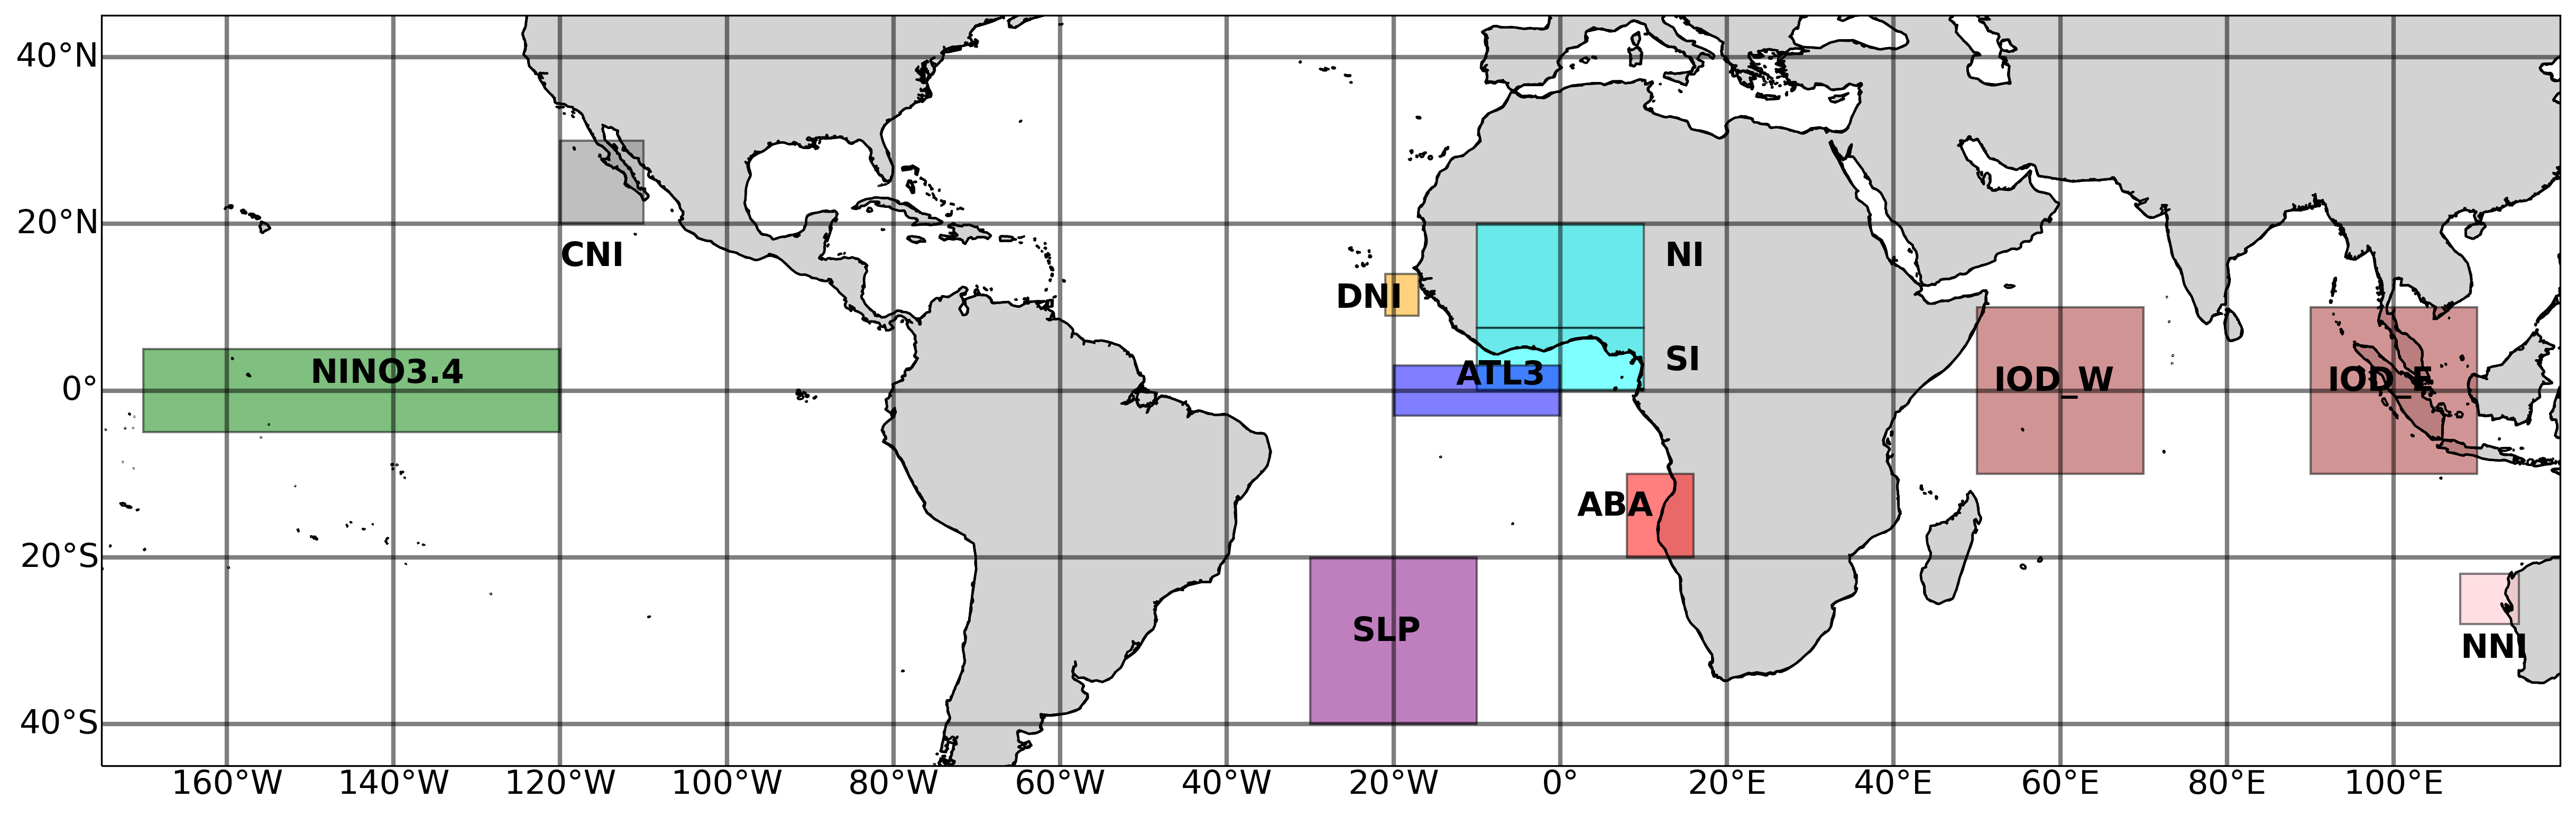

In [2]:
Image(filename='fig_boxes_map.png') 

# Last update 

In [3]:
print(str(now)[:16])

2023-01-23 14:25


# Read SST data 

In [4]:
path_data = 'https://psl.noaa.gov/thredds/dodsC/Datasets/COBE/sst.mon.mean.nc'
#path_data = 'https://downloads.psl.noaa.gov/Datasets/COBE/sst.mon.mean.nc'
(ssta_atl3_norm_cobe,ssta_aba_norm_cobe,
 ssta_nino34_norm_cobe,ssta_dni_norm_cobe,
 ssta_cni_norm_cobe,ssta_nni_norm_cobe) = read_data_compute_anomalies(path_data)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1584)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1891-01-01 1891-02-01 ... 2022-12-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    title:                           COBE Sea Surface Temperature Analysis
    history:                         created June 2011 at ESRL/PSD using the ...
    platform:                        Analyses
    original_source:                 http://near-goos1.jodc.go.jp/cgi-bin/199...
    Conventions:                     CF-1.2
    institution:                     NOAA ESRL/PSD
    comment:                         recent values (w/i last year) may change...
    dataset_title:                   COBE Sea Surface Temperature
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    References:         

In [ ]:
path_oi = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/'
(ssta_atl3_norm_oi,ssta_aba_norm_oi,
 ssta_nino34_norm_oi,ssta_dni_norm_oi,
 ssta_cni_norm_oi,ssta_nni_norm_oi,iod_index) = read_data_compute_anomalies_oi(path_oi)

In [ ]:
path_ersstv5 = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
(ssta_atl3_norm_ersst,ssta_aba_norm_ersst,
 ssta_nino34_norm_ersst,ssta_dni_norm_ersst,
 ssta_cni_norm_ersst,ssta_nni_norm_ersst) = read_data_compute_anomalies_ersstv5(path_ersstv5)

# Timeseries of SST anomalies

# Monthly data <a id='monthly'></a>


# [COBE SST](https://psl.noaa.gov/data/gridded/data.cobe.html) | 1$^{\circ}$ x 1$^{\circ}$ | Monthly

In [ ]:
plot_anomalies(ssta_atl3_norm_cobe,
               ssta_aba_norm_cobe,
               ssta_nino34_norm_cobe,
               ssta_dni_norm_cobe,
               ssta_cni_norm_cobe,
               ssta_nni_norm_cobe)

# [OI SST v2](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html) | 1$^{\circ}$ x 1$^{\circ}$ | Monthly

In [ ]:
plot_anomalies(ssta_atl3_norm_oi,
               ssta_aba_norm_oi,
               ssta_nino34_norm_oi,
               ssta_dni_norm_oi,
               ssta_cni_norm_oi,
               ssta_nni_norm_oi)

# [ERSST V5](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html) | 2$^{\circ}$ x 2$^{\circ}$ | Monthly

In [ ]:
plot_anomalies(ssta_atl3_norm_ersst,
               ssta_aba_norm_ersst,
               ssta_nino34_norm_ersst,
               ssta_dni_norm_ersst,
               ssta_cni_norm_ersst,
               ssta_nni_norm_ersst)

# NCEP-V1 | 2 x 2 | Monthly 

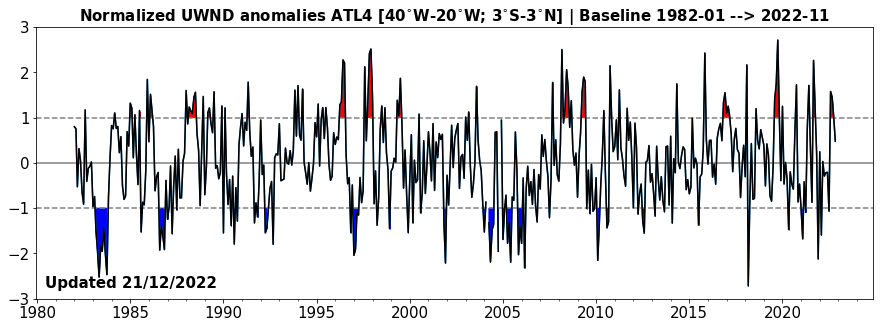

In [10]:
ncep_data = 'https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.mon.mean.nc'
uwnda_atl4_norm = read_compute_anomalies_uwind_plot(ncep_data)

# WAMOI: West African Monsoon onset index from 2000 to present day 
<a id='test'></a>

Methodology from : Fontaine and Louvet (2006)


 # WAMOI = NI$_{std}$ - SI$_{std}$ 
 - with NI being the precipitation averaged over 7.5$^\circ$N-20$^\circ$N; 10$^\circ$W-10$^\circ$E
 - and with SI the precipitation averaged over 0$^\circ$N-7.5$^\circ$N; 10$^\circ$W-10$^\circ$E
 
 --> NI and SI are then standardized i.e. NI$_{std}$ = NI/(std(NI))
 
 
 !! to do apply a butterwoth time filter <15 days !!
 
 
### On the following plot, yearly WAMOI is plotted (grey lines), the mean of the WAMOI over the period 2000-2021 (black line) as well as the current year WAMOI(red line).

# [CPC Merged Analysis of Precipitation](https://psl.noaa.gov/data/gridded/data.cmap.html) | 2.5$^{\circ}$ x 2.5$^{\circ}$ | Weekly 

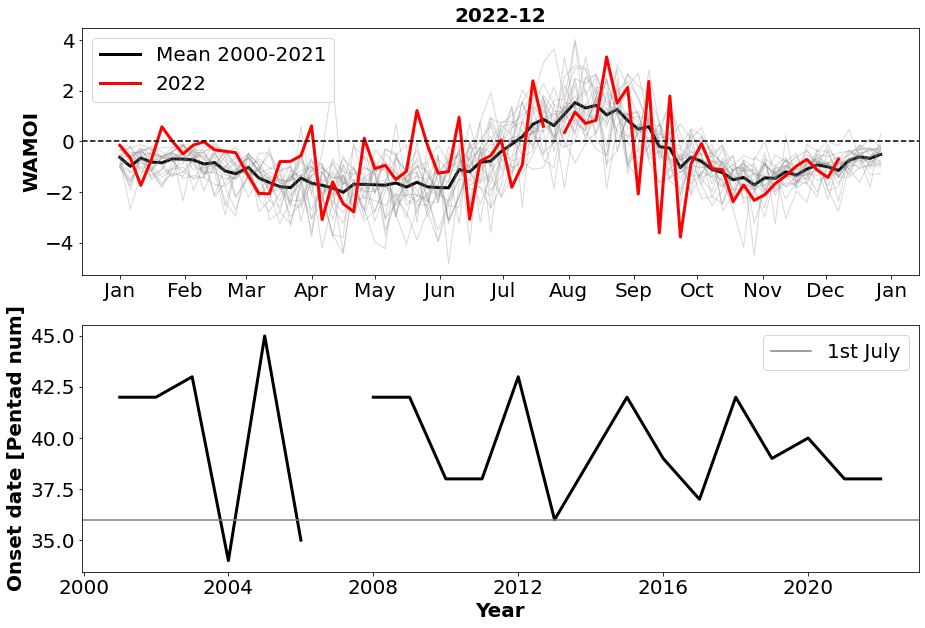

In [11]:
path_cmap = 'https://psl.noaa.gov/thredds/dodsC/Datasets/cmap/rt/precip.pentad.mean.rt.nc'
plot_wamoi(path_cmap)

# [Atlantic Meridional mode](https://www.aos.wisc.edu/~dvimont/MModes/AMM.html) | Chiang and Vimont (2004) | Monthly  <a id='test2'></a>

 The realtime AMM index is defined following the method of Chiang and Vimont (2004). The AMM spatial structure is defined via applying Maximum Covariance Analysis (MCA; Bretherton et al. 1992) is to tropical Atlantic SST and 10m winds over ocean regions between 75E and 15W, 21S to 32N. Data are obtained from the NCEP-NCAR Reanalysis (Kalnay et al. 1996), from NOAA ESRL. The spatial resolution is reduced by averaging three points in the zonal direction, and two points in the latitudinal direction, resulting in approximately 3.8deg latitude by 5.6deg longitude resolution over the region. Next, the seasonal cycle is removed, data are detrended, a three month running mean is applied to the data, and the equatorial Pacific Cold Tongue Index (SST averaged over 180-90W, 6S-6N) is removed (via linear regression) from all points. Finally, the data are weighted by the square root of the cosine of latitude, and the covariance matrix is formed between SST and winds (note the wind fields are appended to each other so the wind state vector has twice as many points as the SST state vector). The covariance matrix is decomposed via Singular Value Decomposition, and the leading statistical mode form the AMM SST and Wind patterns. The time period over which the patterns are computed is frozen as the 1950-2005 time period so that the patterns do not change as the index is being updated.

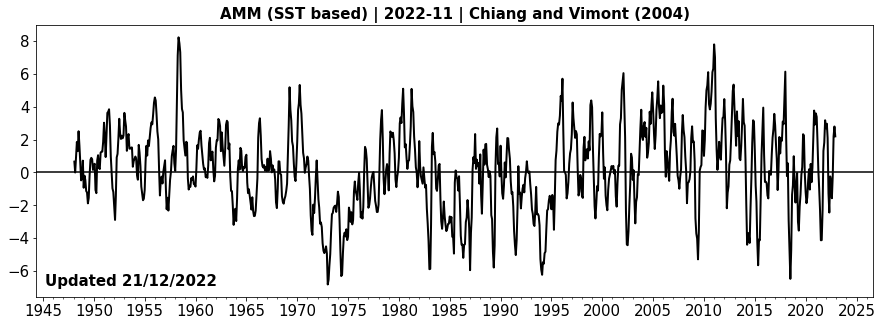

In [12]:
data_amm = 'https://www.aos.wisc.edu/~dvimont/MModes/RealTime/AMM.txt'
plot_amm(data_amm)

# Atlantic Cold Tongue Onset | Caniaux et al., (2011) | Weekly <a id='test3'></a>

Sact  = $\int_{A(x)} He(25^{\circ}C-SST(x))dA$

where He is the Heaviside function (He = 1 when SST < 25$^{\circ}$C
and 0 otherwise). The SST index expresses the intensity of the
cooling in the ACT and is defined point by point by subtracting
the SST for each grid point from a SST of 25$^{\circ}$C
(so that SSTs below 25$^{\circ}$C imply a positive index) inside
the domain A, 30$^{\circ}$W–12$^{\circ}$E and 5$^{\circ}$S–5$^{\circ}$N.

In [14]:
import haversine
def read_data_ACT_week_plot(path_data):

    ds = xr.open_dataset(path_data+'sst.wkmean.1990-present.nc',engine='pydap')
    mask = xr.open_dataset(path_data+'lsmask.nc',engine='pydap')
    ds = ds.sst.where(mask.mask[0,:,:]==1)
    sst= ds.sel(time=slice(datetime.datetime(1990, 1, 1), now))
    sst = xr.concat([sst[:, :, 180:], sst[:, :, :180]], dim='lon')
    sst.coords['lon'] = (sst.coords['lon'] + 180) % 360 - 180  
    
    ## Make sub areas ##
    sst_act = sst.where((  sst.lon>=-30) & (sst.lon<=12) &
                           (sst.lat<=5) & (sst.lat>=-5),drop=True)
    
    
    
    
    
    sst_index = np.array(25-sst_act)
    Sact = np.zeros((sst_act.shape[0]))
    Tact = np.zeros((sst_act.shape[0]))
    X = np.ones((sst_act.shape[2]-1,sst_act.shape[1]-1))
    Y = np.ones((sst_act.shape[2]-1,sst_act.shape[1]-1))
    lon = np.array(sst_act.lon)
    lat = np.array(sst_act.lat)
    for t in range(Sact.shape[0]):
        tmp_sact=0
        tmp_tact=0
        for i in range(sst_act.shape[2]-1):
            for j in range(sst_act.shape[1]-1):



                if sst_index[t,j,i]>0:

                    X = haversine.haversine((lon[i], lat[j]),
                                        (lon[i+1], lat[j]))

                    Y = haversine.haversine((lon[i], lat[j]),
                                        (lon[i], lat[j+1]))
                    tmp_sact += X*Y
                    tmp_tact += X*Y*sst_index[t,j,i]

        Sact[t] =tmp_sact
        Tact[t] = tmp_tact/Sact[t]

    Sact_dataset = xr.Dataset({'sact': (['time'], Sact)},
                          coords={ 'time':(np.array(sst_act.time)),
                              })






    onset_date=[]
    for i in range(1990,now.year+1,1):
        index_tmp = []
        try:

            sact_clim = Sact_dataset.sact.sel(time=slice(datetime.datetime(i, 1, 1),datetime.datetime(i, 12, 31) ))


            for j in range(sact_clim.shape[0]):
                if sact_clim[j]>0.4*1e6:
                    index_tmp.append(j)
            onset_date.append(index_tmp[0])

        except IndexError:

            onset_date.append(np.nan)



    f,ax = plt.subplots(2,1,figsize=[15,10],sharex=True)
    ax=ax.ravel()
    ftz=15
    ax[0].plot(Sact_dataset.time,Sact_dataset.sact*1e-6,color='grey')
    ax[0].tick_params(labelsize=ftz)
    ax[0].axhline(0.4,color='red',label='treshold = 0.4 1e6 km$^{2}$')
    ax[0].legend(fontsize=ftz)
    ax[0].set_ylabel('S$_{act}$ [10$^{6}$ km$^{2}$]',fontsize=ftz,fontweight='bold')
    ax[0].set_title('Atlantic Cold Tongue Onset',fontsize=ftz,fontweight='bold')
    ax[1].set_xlabel('Year', fontsize=ftz)

    locator = mdates.YearLocator(2)  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%Y')
    ax[0].xaxis.set_major_locator(locator)
    # Specify formatter
    ax[0].xaxis.set_major_formatter(fmt)

    xtime = pd.date_range(start='1/1/1989', periods=now.year+1-1990, freq='Y')
    ax[1].plot(xtime,np.array(onset_date)*7,color='black')
    ax[1].tick_params(labelsize=ftz)

    locator = mdates.YearLocator(2)  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%Y')
    ax[1].xaxis.set_major_locator(locator)
    # Specify formatter
    ax[1].xaxis.set_major_formatter(fmt)
    ax[1].set_ylabel('Onset date [Day of year]',fontsize=ftz,fontweight='bold')
    ax[1].axhline(21*7,label='1st June',color='grey')

    ax[1].legend(fontsize=ftz)
    ax[1].text(0.01,0.04,'Updated '+date_time,transform=ax[1].transAxes,
               size=ftz,
               weight='bold')
    
    return sst_act



In [91]:
path_data = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/'
ds = xr.open_dataset(path_data+'sst.wkmean.1990-present.nc',engine='pydap')
mask = xr.open_dataset(path_data+'lsmask.nc',engine='pydap')
for i in range(ds.sst.shape[0]):
    print(i)
    ds.sst[i,:,:] = ds.sst[i,:,:].where(mask.mask.squeeze('time')==1)

0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [92]:
ds.sst[i,:,:].where(mask.mask.squeeze('time')==1)

<xarray.DataArray 'sst' (lat: 180, lon: 360)>
array([[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
       [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
       [-1.79, -1.79, -1.79, ..., -1.79, -1.79, -1.79],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/13)
    long_name:                Weekly Mean of Sea Surface Temperature
    unpacked_valid_range:     [-5.0, 40.0]
    actual_range:             [-1.8, 36.16]
    units:                    degC
    precision:                2
    least_significant_digit:  2
    ...                       ...
    dataset:                  NOAA Optimum Interpolation (OI) SST V2
    level_desc:               Surface
    statistic:                Weekly Mean
    parent_stat:              Individual obs
    standard_name:            sea_surface_temperature
    valid_range:              [-500, 4000]

In [19]:
ds = ds.sst.where(mask.mask[0,:,:]==1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [15]:
path_oi_wk = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/'
sst_act = read_data_ACT_week_plot(path_oi_wk)

IndexError: index 0 is out of bounds for axis 0 with size 0

# [Atlantic Multi-decadal Oscillation](https://psl.noaa.gov/data/timeseries/AMO/) | Enfield et al., (2001) | Monthly <a id='test4'></a>

Method:
 - Use the Kaplan SST dataset (5x5).
 - Compute the area weighted average over the N Atlantic, basically 0 to 70N.
 - Detrend that time series
 - Optionally smooth it with a 121 month smoother.

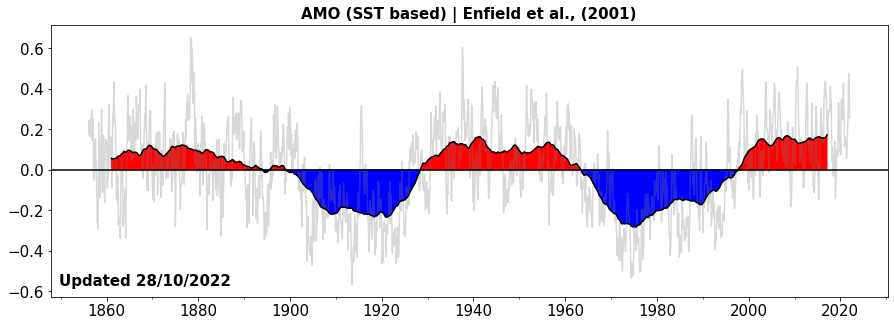

In [14]:

data_amo= 'https://psl.noaa.gov/data/correlation/amon.us.long.data'

plot_amo(data_amo)

# [St Helena index](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html) (SLP based 3-month running mean) | Monthly <a id='test5'></a>

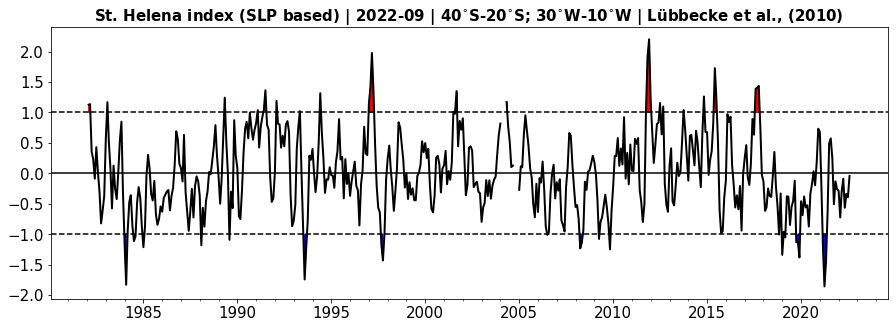

In [15]:
ncep_data_slp = 'https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/slp.mon.mean.nc'
plot_slp(ncep_data_slp)

# References

- Caniaux, G., H. Giordani, J.‐L. Redelsperger, F. Guichard, E. Key, and M. Wade (2011), Coupling between the Atlantic cold tongue and the West African monsoon in boreal spring and summer, J. Geophys. Res., 116, C04003,
doi:10.1029/2010JC006570.
- Chiang, J. C. H., & Vimont, D. J. (2004). Analogous Pacific and Atlantic Meridional Modes of Tropical Atmosphere–Ocean Variability, Journal of Climate, 17(21), 4143-4158.
- Enfield, D.B., A.M. Mestas-Nunez, and P.J. Trimble, 2001: The Atlantic Multidecadal Oscillation and its relationship to rainfall and river flows in the continental U.S., Geophys. Res. Lett., 28: 2077-2080.
- Fontaine, B., and S. Louvet (2006), Sudan-Sahel rainfall onset: Definition of an objective index, types of years, and experimental hindcasts, J. Geophys. Res., 111, D20103, doi:10.1029/2005JD007019.

# Atlantic Niño events

In [16]:
_,_,table_atl3_w,table_atl3_c = create_table_event(ssta_atl3_norm_oi)
table_atl3_w["Start date"] = table_atl3_w["Start date"].dt.strftime('%Y-%m')
table_atl3_w["End date"] = table_atl3_w["End date"].dt.strftime('%Y-%m')

table_atl3_w

Start date End date
0    1987-11  1988-09
1    1995-03  1995-08
2    1996-04  1996-08
3    1997-12  1998-05
4    1999-05  1999-09
5    2019-11  2020-03
6    2021-06  2021-12

In [17]:
table_atl3_c = table_atl3_c.style.set_caption('Atlantic Niña events since 1982')
table_atl3_c

# Benguela Niño events

In [18]:
_,_,table_aba_w,table_aba_c = create_table_event(ssta_aba_norm_oi)
table_atl3_w = table_aba_w.style.set_caption('Benguela Niño events since 1982')
table_atl3_w

In [19]:
table_atl3_c = table_aba_c.style.set_caption('Benguela Niña events since 1982')
table_atl3_c

# Canonical/Non-canonical Atlantic Niños <a id='test6'></a>

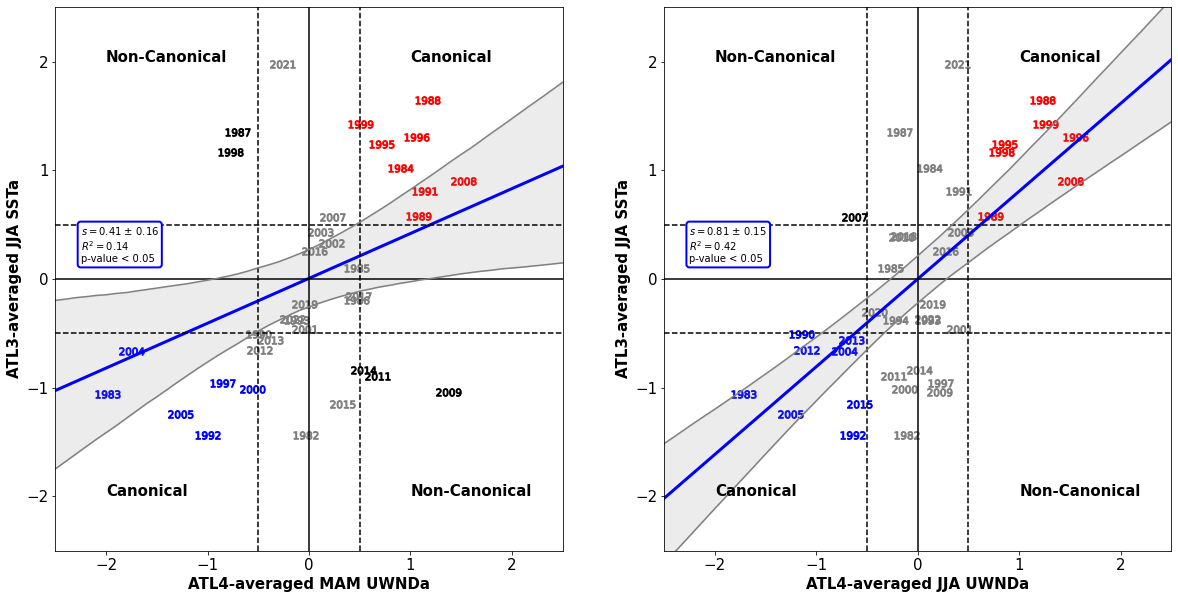

In [20]:
plot_canonical_atlantic_ninos(uwnda_atl4_norm,ssta_atl3_norm_cobe)

# Indian Ocean Dipole index  <a id='test7'></a>

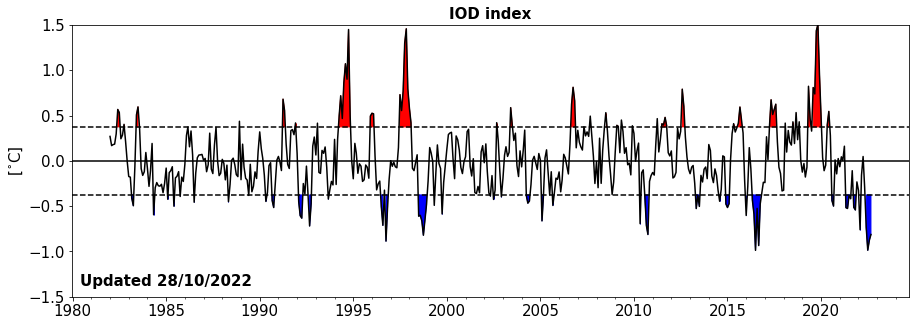

In [21]:
plot_IOD(iod_index)

# [Forecast from CFSv2 next three month](https://www.cpc.ncep.noaa.gov/products/CFSv2/CFSv2_body.html) <a id='test8'></a>

# +1 month

In [22]:
Image(url='https://www.cpc.ncep.noaa.gov/products/CFSv2/imagesInd3/glbSSTMonInd2.gif')  

# +2 month

In [23]:
Image(url='https://www.cpc.ncep.noaa.gov/products/CFSv2/imagesInd3/glbSSTMonInd3.gif') 

# +3 Month

In [24]:
Image(url='https://www.cpc.ncep.noaa.gov/products/CFSv2/imagesInd3/glbSSTMonInd4.gif') 

In [10]:
Image(url='https://climatereanalyzer.org/wx/todays-weather/input/gfs_world-wt_sstanom_d1.png')         
 

In [12]:
Image(url='https://climatereanalyzer.org/wx/todays-weather/input/gfs_world-wt_sst_d1.png') 

# Subsurface temperature anomalies 

In [27]:
Image(url='https://www.cpc.ncep.noaa.gov/products/GODAS/pent_gif/xz/movie.temp.0n.gif',width=800)

# Z20 anomalies

In [28]:
Image(url='https://www.cpc.ncep.noaa.gov/products/GODAS/pent_gif/xy/movie.d20.gif',width=800)